In [7]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import sys
import os

In [4]:
tf.test.is_built_with_cuda()

True

In [8]:
def load_batch(fpath, label_key='labels'):
    """Internal utility for parsing CIFAR data.
    # Arguments
        fpath: path the file to parse.
        label_key: key for label data in the retrieve
            dictionary.
    # Returns
        A tuple `(data, labels)`.
    """
    with open(fpath, 'rb') as f:
        if sys.version_info < (3,):
            d = pickle.load(f)
        else:
            d = pickle.load(f, encoding='bytes')
            # decode utf8
            d_decoded = {}
            for k, v in d.items():
                d_decoded[k.decode('utf8')] = v
            d = d_decoded
    data = d['data']
    labels = d[label_key]

    data = data.reshape(data.shape[0], 3, 32, 32)
    return data, labels

In [10]:
def load_data():
    """Loads CIFAR10 dataset.
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    """
    path = 'cifar-10-batches-py'

    num_train_samples = 50000

    x_train_local = np.empty((num_train_samples, 3, 32, 32), dtype='uint8')
    y_train_local = np.empty((num_train_samples,), dtype='uint8')

    for i in range(1, 6):
        fpath = os.path.join(path, 'data_batch_' + str(i))
        (x_train_local[(i - 1) * 10000: i * 10000, :, :, :],
         y_train_local[(i - 1) * 10000: i * 10000]) = load_batch(fpath)

    fpath = os.path.join(path, 'test_batch')
    x_test_local, y_test_local = load_batch(fpath)

    y_train_local = np.reshape(y_train_local, (len(y_train_local), 1))
    y_test_local = np.reshape(y_test_local, (len(y_test_local), 1))

    if K.image_data_format() == 'channels_last':
        x_train_local = x_train_local.transpose(0, 2, 3, 1)
        x_test_local = x_test_local.transpose(0, 2, 3, 1)

    return (x_train_local, y_train_local), (x_test_local, y_test_local)

In [12]:
from keras import backend as K

In [15]:
(X_train, y_train), (X_test, y_test) = load_data()

In [16]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
X_test.shape

(10000, 32, 32, 3)

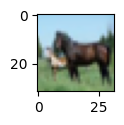

In [26]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[12])

In [19]:
y_test.shape

(10000, 1)

In [30]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]])

In [27]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [38]:
y_train.shape

(50000, 1)

In [39]:
y_train=y_train.reshape(-1,)

In [40]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

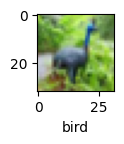

In [41]:
plot_sample(X_train,y_train,6)

In [43]:
X_train=X_train/255
X_test=X_test/255